<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 5: Tidepool  Hackathon 

_Authors: Schubert H. Laforest (BOS), Elizabeth Tyree (BOS)_

---
<a id='part0'></a>
# Project Goal
**Bethany's Directives: **
Using a limited number of observations taken from the blood glucose meters of insulin dependent diabetics, build, test and assess the effectiveness of a supervised classification model to predict whether to patient is **Type 1** or **Type 2** diabetic.

**Classification Model Randomly Assigned: ** Logistic Regression

**Dataset: ** `type1-and-type2-data-cleaned.csv`

# Notebook Guide
- [Preparing the Data and Exploratory Data Analysis](#part1)
- [Feature Engineering](#part2)
- [Deploying a Logistic Regression Model and Evaluating It](#part3)
- [Room for Further Exploration](#part4)

<a id='part1'></a>
# Part 1: Preparing the Data and Exploratory Data Analysis

## Importing Libaries

In [1]:
# General imports 
import numpy as np
import random
random.seed(42)
import pandas as pd
from pprint import pprint
import patsy
pd.set_option('display.max_columns', None) 

#Datetime imports 
import ast
import datetime as dt
from datetime import timedelta

# Modeling, metrics and evaluation imports 
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV, LogisticRegression
from sklearn.model_selection import cross_val_score, StratifiedShuffleSplit
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc, confusion_matrix

# Graphing & Plotting imports 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
%matplotlib inline

## Data Dictionary (Provided) 


**hashID: **			donor ID

**diagnosisType: ** 		type1 or type2

**currentAge: **			donor's age

**diagnosisAge: **			donor's diagnosis age

**yearsLivingWithDiabetes: **	the number of years the donor has been living with diabetes

**basal.count: **			the number of basal insulin records the donor has

**bolus.count: **			the number of bolus insulin records

**cbg.count: **			the number of contiguous blood glucose records

**deviceEvent.count: **		the number of device activity records

**pumpSettings.count: **		the number of pump setting records

**smbg.count: **			the number of blood glucose meter records

**upload.count: **			the number of upload records

**wizard.count: **			the number of bolus calculator records

**cbg.nUniqueDeviceIds: **		the number of unique devices the donor has for this data type

**bolus.nUniqueDeviceIds: **	the number of unique devices the donor has for this data type

**smbg.nUniqueDeviceIds: **		the number of unique devices the donor has for this data type

**basal.nDaysWithData: **		the number of days the donor has this data type

**bolus.nDaysWithData: **		the number of days the donor has this data type

**cbg.nDaysWithData: **		the number of days the donor has this data type

**deviceEvent.nDaysWithData: **	the number of days the donor has this data type

**pumpSettings.nDaysWithData: **	the number of days the donor has this data type

**smbg.nDaysWithData: **		the number of days the donor has this data type

**upload.nDaysWithData: **		the number of days the donor has this data type

**wizard.nDaysWithData: **		the number of days the donor has this data type

**cgmSettings.count: **		the number of contiguous glucose monitor setting records

**cgmSettings.nDaysWithData: **	the number of days the donor has this data type



## Quick Facts

**Difference between Type 1 and Type 2 diabetes**

Both types of diabetes are chronic diseases that affect the way your body regulates blood sugar, or glucose. Glucose is the fuel that feeds your body’s cells, but to enter your cells it needs a key. Insulin is that key.

**Type 1 **: Do not produce insulin 

**Type 2**: Don't respond well enough to insulin as they should, and eventually do not produce enough insulin

*Symptoms between the two are similar, however*:
- Many ppl with Type 2 won't have symptoms for several years
- Type 2 symptoms develop slowly over the course of time
- Type 1 develops quickly, usually in childhood and teenagehood, but can be developed later in life.

*Regarding Basal-Bolus Regimen*:
- A basal-bolus injection regimen involves taking a number of injections through the day.

- A basal-bolus regimen, which includes an injection at each meal, attempts to roughly emulate how a non-diabetic person’s body delivers insulin.

- A basal-bolus regimen may be applicable to people with type 1 and type 2 diabetes.


[Source](https://www.diabetes.co.uk/insulin/basal-bolus.html) 


## Loading data

In [2]:
data = pd.read_csv('./data/type1-and-type2-data-cleaned.csv') 

## Viewing the head of the data.

In [3]:
data.head()

,hashID,diagnosisType,currentAge,diagnosisAge,yearsLivingWithDiabetes,basal.count,bolus.count,cbg.count,deviceEvent.count,pumpSettings.count,smbg.count,upload.count,wizard.count,cbg.nUniqueDeviceIds,bolus.nUniqueDeviceIds,smbg.nUniqueDeviceIds,basal.nDaysWithData,bolus.nDaysWithData,cbg.nDaysWithData,deviceEvent.nDaysWithData,pumpSettings.nDaysWithData,smbg.nDaysWithData,upload.nDaysWithData,wizard.nDaysWithData,cgmSettings.count,cgmSettings.nDaysWithData
0,92c2847d30b6514ac8a6385f04b3bf3c92ee87a8b89cb8...,type2,59,20,38,NaN,NaN,NaN,NaN,NaN,71.0,1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,48.0,1,NaN,NaN,NaN
1,6b720ecfc94a90f7c75a39f80a97eac27969ca95a2e6fb...,type2,65,45,19,NaN,NaN,NaN,NaN,NaN,303.0,22,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,41.0,14,NaN,NaN,NaN
2,e0ef840bd07fc79f10b8e21a7f6f3d53ef3b7594d94ec0...,type1,32,15,17,2712.0,1268.0,29811.0,637.0,24.0,1797.0,6,1257.0,12.0,12.0,12.0,213.0,212.0,110.0,150.0,23.0,213.0,5,212.0,NaN,NaN
3,8974377383af45404d560543b58749b240c78885ca0710...,type1,47,14,32,NaN,NaN,10279.0,2.0,NaN,19.0,1,NaN,1.0,NaN,1.0,NaN,NaN,112.0,2.0,NaN,16.0,1,NaN,NaN,NaN
4,f92417af60cc16f254600f310df4d15d4a50973de26223...,type2,62,53,8,NaN,NaN,NaN,NaN,NaN,750.0,1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,400.0,1,NaN,NaN,NaN


## Getting more information about the features within the dataset and their associated data types.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386 entries, 0 to 385
Data columns (total 26 columns):
hashID                        386 non-null object
diagnosisType                 386 non-null object
currentAge                    386 non-null int64
diagnosisAge                  386 non-null int64
yearsLivingWithDiabetes       386 non-null int64
basal.count                   170 non-null float64
bolus.count                   170 non-null float64
cbg.count                     288 non-null float64
deviceEvent.count             229 non-null float64
pumpSettings.count            170 non-null float64
smbg.count                    272 non-null float64
upload.count                  386 non-null int64
wizard.count                  169 non-null float64
cbg.nUniqueDeviceIds          288 non-null float64
bolus.nUniqueDeviceIds        170 non-null float64
smbg.nUniqueDeviceIds         272 non-null float64
basal.nDaysWithData           170 non-null float64
bolus.nDaysWithData           170 non-

## Looking at the shape of the data. There are 386 Observations and 26 Features.

In [5]:
data.shape

(386, 26)

## Identifying the amount of missing observations per feature.

In [6]:
[print(i, data[i].isnull().sum())  for i in data.columns]; 

hashID 0
diagnosisType 0
currentAge 0
diagnosisAge 0
yearsLivingWithDiabetes 0
basal.count 216
bolus.count 216
cbg.count 98
deviceEvent.count 157
pumpSettings.count 216
smbg.count 114
upload.count 0
wizard.count 217
cbg.nUniqueDeviceIds 98
bolus.nUniqueDeviceIds 216
smbg.nUniqueDeviceIds 114
basal.nDaysWithData 216
bolus.nDaysWithData 216
cbg.nDaysWithData 98
deviceEvent.nDaysWithData 157
pumpSettings.nDaysWithData 216
smbg.nDaysWithData 114
upload.nDaysWithData 0
wizard.nDaysWithData 217
cgmSettings.count 321
cgmSettings.nDaysWithData 321


## Assigning the shape of the data to a variable and comparing it to the shape of the data set if all missing values where removed. 

In [7]:
data_orignial_shape = data.shape
print('The orignial shape of the data is {} observations (rows) and {} features (columns).'.format(data_orignial_shape[0],data_orignial_shape[1]))
print('')
print('With respect to missing data:')
data_no_nan = data.dropna()
dnns = data_no_nan.shape
print("The Two features missing the most data at {:.2f}% missing are 'cgmSettings.count' and 'cgmSettings.nDaysWithData'.".format(321/386*100))
print('The shape of the data if all missing values were removed would be {} observations (rows) and {} features (columns).'.format(dnns[0],dnns[1]))
print('This means {:.2f}% of the total data set would also be eliminated if all missing values were removed.'.format(((1-dnns[0]/data_orignial_shape[0])*100)))
# The math is (1 - 48/386)*100.

The orignial shape of the data is 386 observations (rows) and 26 features (columns).

With respect to missing data:
The Two features missing the most data at 83.16% missing are 'cgmSettings.count' and 'cgmSettings.nDaysWithData'.
The shape of the data if all missing values were removed would be 48 observations (rows) and 26 features (columns).
This means 87.56% of the total data set would also be eliminated if all missing values were removed.


## Looking only at the observations where 'basal.count' is missing.

In [8]:
data[data['basal.count'].isnull()]

,hashID,diagnosisType,currentAge,diagnosisAge,yearsLivingWithDiabetes,basal.count,bolus.count,cbg.count,deviceEvent.count,pumpSettings.count,smbg.count,upload.count,wizard.count,cbg.nUniqueDeviceIds,bolus.nUniqueDeviceIds,smbg.nUniqueDeviceIds,basal.nDaysWithData,bolus.nDaysWithData,cbg.nDaysWithData,deviceEvent.nDaysWithData,pumpSettings.nDaysWithData,smbg.nDaysWithData,upload.nDaysWithData,wizard.nDaysWithData,cgmSettings.count,cgmSettings.nDaysWithData
0,92c2847d30b6514ac8a6385f04b3bf3c92ee87a8b89cb8...,type2,59,20,38,NaN,NaN,NaN,NaN,NaN,71.0,1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,48.0,1,NaN,NaN,NaN
1,6b720ecfc94a90f7c75a39f80a97eac27969ca95a2e6fb...,type2,65,45,19,NaN,NaN,NaN,NaN,NaN,303.0,22,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,41.0,14,NaN,NaN,NaN
3,8974377383af45404d560543b58749b240c78885ca0710...,type1,47,14,32,NaN,NaN,10279.0,2.0,NaN,19.0,1,NaN,1.0,NaN,1.0,NaN,NaN,112.0,2.0,NaN,16.0,1,NaN,NaN,NaN
4,f92417af60cc16f254600f310df4d15d4a50973de26223...,type2,62,53,8,NaN,NaN,NaN,NaN,NaN,750.0,1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,400.0,1,NaN,NaN,NaN
5,b96eee9a57d57b6fcf3d9326ae8372bd196706da93caa4...,type1,4,4,0,NaN,NaN,NaN,NaN,NaN,646.0,29,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,66.0,14,NaN,NaN,NaN
6,8a2da88b5859a2cf5635a3ca35da1d3456fadd4272f9e3...,type1,26,7,19,NaN,NaN,4409.0,1.0,NaN,NaN,1,NaN,1.0,NaN,NaN,NaN,NaN,51.0,1.0,NaN,NaN,1,NaN,NaN,NaN
7,73d26fe0f67c6731617902c43fba936e5ff55c36bd12ff...,type1,18,8,10,NaN,NaN,14149.0,NaN,NaN,NaN,2294,NaN,1.0,NaN,NaN,NaN,NaN,55.0,NaN,NaN,NaN,25,NaN,NaN,NaN
8,db17945b2ce9557cb456172f94d43ea170d045d92282b8...,type1,45,5,40,NaN,NaN,5443.0,NaN,NaN,NaN,1215,NaN,1.0,NaN,NaN,NaN,NaN,21.0,NaN,NaN,NaN,20,NaN,NaN,NaN
9,1476f11455ec5e9c2d2d6392545178d8c6184257134b45...,type2,39,23,16,NaN,NaN,344.0,NaN,NaN,NaN,1,NaN,1.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,1,NaN,NaN,NaN
15,e7b770ba3dc2b600f7bd1c529f88177afec0aca3b07578...,type1,40,10,29,NaN,NaN,5179.0,1.0,NaN,NaN,2,NaN,1.0,NaN,NaN,NaN,NaN,60.0,1.0,NaN,NaN,2,NaN,NaN,NaN


## Looking at the unique values in 'basal.count'

In [9]:
data['basal.count'].unique()

array([       nan, 2.7120e+03, 4.9000e+02, 7.4400e+02, 7.9200e+02,
       2.7000e+02, 7.8500e+02, 1.8200e+02, 6.6900e+02, 1.5960e+03,
       8.4200e+02, 1.0400e+03, 7.6200e+02, 5.4800e+02, 1.2628e+04,
       9.0500e+02, 1.7200e+02, 1.3200e+03, 9.4400e+02, 7.5000e+02,
       1.7000e+02, 7.2000e+01, 1.3330e+03, 1.0310e+03, 4.1800e+02,
       1.5900e+02, 7.3000e+01, 8.5200e+02, 1.3100e+02, 1.7500e+02,
       7.8300e+02, 1.1610e+03, 1.2060e+03, 9.5800e+02, 2.9000e+02,
       1.2680e+03, 3.0000e+00, 1.4780e+03, 3.6920e+03, 2.4690e+03,
       5.0000e+01, 2.6900e+02, 1.8010e+03, 5.7300e+02, 9.7200e+02,
       4.2530e+03, 3.3040e+03, 2.0100e+02, 1.0570e+03, 7.8600e+02,
       8.4000e+02, 9.0900e+02, 1.9100e+02, 9.2890e+03, 2.7250e+03,
       1.6200e+02, 3.7300e+02, 6.1000e+02, 2.5500e+02, 1.8700e+03,
       3.0243e+04, 9.6500e+02, 6.0000e+01, 7.5460e+03, 8.3900e+02,
       1.3989e+04, 4.4540e+03, 8.4000e+01, 3.7400e+02, 2.0450e+03,
       1.0450e+03, 3.4500e+02, 1.8400e+02, 1.8847e+04, 1.2900e

<a id='part2'></a>
# Part 2: Feature Engineering

- Filling in the missing data with 0's in order to categorize those features in a binary manner. 

- For every feature that was missing data there is now a categorical feature and the original feature with all of the `NaN`'s filled in with 0's. This process creates a degree of redundancy within the data set. We decided the redundancy was worth it in order to preserve the data. It would also allow the customer to still connect machine information with the model's predictions.


In [10]:
# The new categorical features are added to the end of the data set, and all of them start with "has_a_ ".

data = data.fillna(0) # This fills in the nan's with zero's.

# Creating the new categorical features.
data['has_a_basal.count'] = data['basal.count'].map(lambda x: 1 if x > 0 else 0)
data['has_a_bolus.count'] = data['bolus.count'].map(lambda x: 1 if x > 0 else 0)
data['has_a_cbg.count' ] = data['cbg.count'].map(lambda x: 1 if x > 0 else 0)
data['has_a_deviceEvent.count'] = data['deviceEvent.count'].map(lambda x: 1 if x > 0 else 0)
data['has_a_pumpSettings.count'] = data['pumpSettings.count'].map(lambda x: 1 if x > 0 else 0)
data['has_a_smbg.count'] = data['smbg.count'].map(lambda x: 1 if x > 0 else 0)
data['has_a_wizard.count'] = data['wizard.count'].map(lambda x: 1 if x > 0 else 0) 
data['has_a_cbg.nUniqueDeviceIds'] = data['cbg.nUniqueDeviceIds'].map(lambda x: 1 if x > 0 else 0)  
data['has_a_bolus.nUniqueDeviceIds'] = data['bolus.nUniqueDeviceIds'].map(lambda x: 1 if x > 0 else 0)  
data['has_a_smbg.nUniqueDeviceIds'] = data['smbg.nUniqueDeviceIds'].map(lambda x: 1 if x > 0 else 0)  
data['has_a_basal.nDaysWithData'] = data['basal.nDaysWithData'].map(lambda x: 1 if x > 0 else 0)  
data['has_a_bolus.nDaysWithData'] = data['bolus.nDaysWithData'].map(lambda x: 1 if x > 0 else 0)  
data['has_a_cbg.nDaysWithData'] = data['cbg.nDaysWithData'].map(lambda x: 1 if x > 0 else 0)  
data['has_a_deviceEvent.nDaysWithData'] = data['deviceEvent.nDaysWithData'].map(lambda x: 1 if x > 0 else 0)  
data['has_a_pumpSettings.nDaysWithData'] = data['pumpSettings.nDaysWithData'].map(lambda x: 1 if x > 0 else 0)  
data['has_a_smbg.nDaysWithData'] = data['smbg.nDaysWithData'].map(lambda x: 1 if x > 0 else 0)  
data['has_a_wizard.nDaysWithData'] = data['wizard.nDaysWithData'].map(lambda x: 1 if x > 0 else 0)  
data['has_a_cgmSettings.count'] = data['cgmSettings.count'].map(lambda x: 1 if x > 0 else 0)  
data['has_a_cgmSettings.nDaysWithData'] = data['cgmSettings.nDaysWithData'].map(lambda x: 1 if x > 0 else 0)  

## Double checking the shape of the data and the number of newly created features.

In [11]:
data.shape

(386, 45)

## Looking at the head of the data to see if the changes persisted.

In [12]:
data.head()

,hashID,diagnosisType,currentAge,diagnosisAge,yearsLivingWithDiabetes,basal.count,bolus.count,cbg.count,deviceEvent.count,pumpSettings.count,smbg.count,upload.count,wizard.count,cbg.nUniqueDeviceIds,bolus.nUniqueDeviceIds,smbg.nUniqueDeviceIds,basal.nDaysWithData,bolus.nDaysWithData,cbg.nDaysWithData,deviceEvent.nDaysWithData,pumpSettings.nDaysWithData,smbg.nDaysWithData,upload.nDaysWithData,wizard.nDaysWithData,cgmSettings.count,cgmSettings.nDaysWithData,has_a_basal.count,has_a_bolus.count,has_a_cbg.count,has_a_deviceEvent.count,has_a_pumpSettings.count,has_a_smbg.count,has_a_wizard.count,has_a_cbg.nUniqueDeviceIds,has_a_bolus.nUniqueDeviceIds,has_a_smbg.nUniqueDeviceIds,has_a_basal.nDaysWithData,has_a_bolus.nDaysWithData,has_a_cbg.nDaysWithData,has_a_deviceEvent.nDaysWithData,has_a_pumpSettings.nDaysWithData,has_a_smbg.nDaysWithData,has_a_wizard.nDaysWithData,has_a_cgmSettings.count,has_a_cgmSettings.nDaysWithData
0,92c2847d30b6514ac8a6385f04b3bf3c92ee87a8b89cb8...,type2,59,20,38,0.0,0.0,0.0,0.0,0.0,71.0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,48.0,1,0.0,0.0,0.0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0
1,6b720ecfc94a90f7c75a39f80a97eac27969ca95a2e6fb...,type2,65,45,19,0.0,0.0,0.0,0.0,0.0,303.0,22,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,41.0,14,0.0,0.0,0.0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0
2,e0ef840bd07fc79f10b8e21a7f6f3d53ef3b7594d94ec0...,type1,32,15,17,2712.0,1268.0,29811.0,637.0,24.0,1797.0,6,1257.0,12.0,12.0,12.0,213.0,212.0,110.0,150.0,23.0,213.0,5,212.0,0.0,0.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0
3,8974377383af45404d560543b58749b240c78885ca0710...,type1,47,14,32,0.0,0.0,10279.0,2.0,0.0,19.0,1,0.0,1.0,0.0,1.0,0.0,0.0,112.0,2.0,0.0,16.0,1,0.0,0.0,0.0,0,0,1,1,0,1,0,1,0,1,0,0,1,1,0,1,0,0,0
4,f92417af60cc16f254600f310df4d15d4a50973de26223...,type2,62,53,8,0.0,0.0,0.0,0.0,0.0,750.0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,400.0,1,0.0,0.0,0.0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0


## Looking at the basal.count features side by side.

In [13]:
data[['has_a_basal.count','basal.count']] 

,has_a_basal.count,basal.count
0,0,0.0
1,0,0.0
2,1,2712.0
3,0,0.0
4,0,0.0
5,0,0.0
6,0,0.0
7,0,0.0
8,0,0.0
9,0,0.0


## Creating two data frames. One with only Type 1 diabetics and the other with only Type 2 diabetics.

In [14]:
type1 = data[data['diagnosisType'] == 'type1']
type2 = data[data['diagnosisType'] == 'type2']

In [15]:
type1.shape # Checking the shape of type1.

(328, 45)

In [16]:
type2.shape # Checking the shape of type2.

(58, 45)

## There is an imbalance of the classes within the data. Type 1 diabetes is the dominant class.

In [17]:
328/58 # There is about a 6:1 ratio of Type 1 to Type 2 diabetics in this data set. However, Type 1 is more rare.

5.655172413793103

## Plotting a histogram of Diagnosis Age

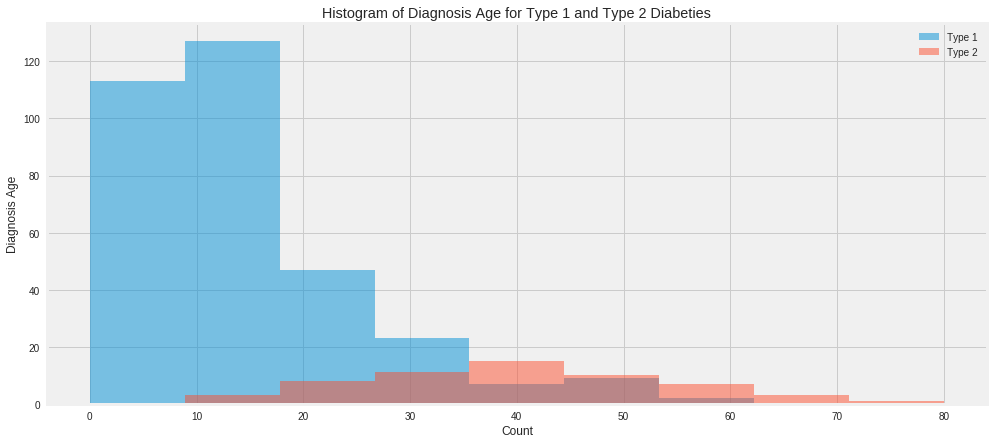

In [18]:
from matplotlib import pyplot
fig = plt.figure(figsize=(15,7))
x1_type1 = type1['diagnosisAge']
x2_type2 = type2['diagnosisAge']

bins = np.linspace(0, 80, 10)

pyplot.hist(x1_type1, bins, alpha=0.5, label='Type 1')
pyplot.hist(x2_type2, bins, alpha=0.5, label='Type 2')
pyplot.legend(loc='upper right')
pyplot.title('Histogram of Diagnosis Age for Type 1 and Type 2 Diabeties')
pyplot.xlabel('Count')
pyplot.ylabel('Diagnosis Age')
pyplot.show()

## Looking at the type1 data only.

In [19]:
type1

,hashID,diagnosisType,currentAge,diagnosisAge,yearsLivingWithDiabetes,basal.count,bolus.count,cbg.count,deviceEvent.count,pumpSettings.count,smbg.count,upload.count,wizard.count,cbg.nUniqueDeviceIds,bolus.nUniqueDeviceIds,smbg.nUniqueDeviceIds,basal.nDaysWithData,bolus.nDaysWithData,cbg.nDaysWithData,deviceEvent.nDaysWithData,pumpSettings.nDaysWithData,smbg.nDaysWithData,upload.nDaysWithData,wizard.nDaysWithData,cgmSettings.count,cgmSettings.nDaysWithData,has_a_basal.count,has_a_bolus.count,has_a_cbg.count,has_a_deviceEvent.count,has_a_pumpSettings.count,has_a_smbg.count,has_a_wizard.count,has_a_cbg.nUniqueDeviceIds,has_a_bolus.nUniqueDeviceIds,has_a_smbg.nUniqueDeviceIds,has_a_basal.nDaysWithData,has_a_bolus.nDaysWithData,has_a_cbg.nDaysWithData,has_a_deviceEvent.nDaysWithData,has_a_pumpSettings.nDaysWithData,has_a_smbg.nDaysWithData,has_a_wizard.nDaysWithData,has_a_cgmSettings.count,has_a_cgmSettings.nDaysWithData
2,e0ef840bd07fc79f10b8e21a7f6f3d53ef3b7594d94ec0...,type1,32,15,17,2712.0,1268.0,29811.0,637.0,24.0,1797.0,6,1257.0,12.0,12.0,12.0,213.0,212.0,110.0,150.0,23.0,213.0,5,212.0,0.0,0.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0
3,8974377383af45404d560543b58749b240c78885ca0710...,type1,47,14,32,0.0,0.0,10279.0,2.0,0.0,19.0,1,0.0,1.0,0.0,1.0,0.0,0.0,112.0,2.0,0.0,16.0,1,0.0,0.0,0.0,0,0,1,1,0,1,0,1,0,1,0,0,1,1,0,1,0,0,0
5,b96eee9a57d57b6fcf3d9326ae8372bd196706da93caa4...,type1,4,4,0,0.0,0.0,0.0,0.0,0.0,646.0,29,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,66.0,14,0.0,0.0,0.0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0
6,8a2da88b5859a2cf5635a3ca35da1d3456fadd4272f9e3...,type1,26,7,19,0.0,0.0,4409.0,1.0,0.0,0.0,1,0.0,1.0,0.0,0.0,0.0,0.0,51.0,1.0,0.0,0.0,1,0.0,0.0,0.0,0,0,1,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0
7,73d26fe0f67c6731617902c43fba936e5ff55c36bd12ff...,type1,18,8,10,0.0,0.0,14149.0,0.0,0.0,0.0,2294,0.0,1.0,0.0,0.0,0.0,0.0,55.0,0.0,0.0,0.0,25,0.0,0.0,0.0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
8,db17945b2ce9557cb456172f94d43ea170d045d92282b8...,type1,45,5,40,0.0,0.0,5443.0,0.0,0.0,0.0,1215,0.0,1.0,0.0,0.0,0.0,0.0,21.0,0.0,0.0,0.0,20,0.0,0.0,0.0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
10,ebf4dee584d8b5fd1958b41791182633f6230fb9592499...,type1,6,2,3,490.0,521.0,219077.0,1919.0,3.0,1384.0,4265,462.0,2.0,1.0,2.0,93.0,92.0,881.0,780.0,3.0,125.0,56,92.0,0.0,0.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0
11,517c7bfb2dca210564375cc9aa13fd659a3da9b2eb7cfb...,type1,24,13,10,744.0,462.0,23323.0,48.0,7.0,267.0,5,427.0,1.0,1.0,1.0,55.0,55.0,141.0,13.0,4.0,55.0,4,55.0,0.0,0.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0
12,ccd5a490a57c4297b170659b411443c97cbffd99be76f6...,type1,45,30,15,792.0,458.0,11520.0,306.0,5.0,347.0,1082,360.0,1.0,1.0,1.0,85.0,85.0,43.0,88.0,3.0,85.0,19,85.0,0.0,0.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0
13,beaae9d14c5fc2b3a40345f899683d1f0094c303eb2b01...,type1,35,25,9,270.0,492.0,53079.0,107.0,1.0,808.0,222,478.0,2.0,1.0,2.0,45.0,89.0,214.0,40.0,1.0,152.0,5,89.0,0.0,0.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0


In [20]:
(type1['basal.count'] == 0).sum()

165

In [21]:
(type2['basal.count'] == 0).sum()

51

In [22]:
temp_list = list(data.columns)
temp_list

['hashID',
 'diagnosisType',
 'currentAge',
 'diagnosisAge',
 'yearsLivingWithDiabetes',
 'basal.count',
 'bolus.count',
 'cbg.count',
 'deviceEvent.count',
 'pumpSettings.count',
 'smbg.count',
 'upload.count',
 'wizard.count',
 'cbg.nUniqueDeviceIds',
 'bolus.nUniqueDeviceIds',
 'smbg.nUniqueDeviceIds',
 'basal.nDaysWithData',
 'bolus.nDaysWithData',
 'cbg.nDaysWithData',
 'deviceEvent.nDaysWithData',
 'pumpSettings.nDaysWithData',
 'smbg.nDaysWithData',
 'upload.nDaysWithData',
 'wizard.nDaysWithData',
 'cgmSettings.count',
 'cgmSettings.nDaysWithData',
 'has_a_basal.count',
 'has_a_bolus.count',
 'has_a_cbg.count',
 'has_a_deviceEvent.count',
 'has_a_pumpSettings.count',
 'has_a_smbg.count',
 'has_a_wizard.count',
 'has_a_cbg.nUniqueDeviceIds',
 'has_a_bolus.nUniqueDeviceIds',
 'has_a_smbg.nUniqueDeviceIds',
 'has_a_basal.nDaysWithData',
 'has_a_bolus.nDaysWithData',
 'has_a_cbg.nDaysWithData',
 'has_a_deviceEvent.nDaysWithData',
 'has_a_pumpSettings.nDaysWithData',
 'has_a_smbg.nD

In [23]:
# Organizing the Dataframe for increased readability 
organized_data = data[[
'hashID',
 'diagnosisType',
 'currentAge',
 'diagnosisAge',
 'yearsLivingWithDiabetes',
 'has_a_basal.count','basal.count',
 'has_a_bolus.count','bolus.count',
 'has_a_cbg.count','cbg.count',
 'has_a_deviceEvent.count','deviceEvent.count',
 'has_a_pumpSettings.count','pumpSettings.count', 
 'has_a_smbg.count','smbg.count', 
 'upload.count',
 'has_a_wizard.count','wizard.count',
 'has_a_cbg.nUniqueDeviceIds','cbg.nUniqueDeviceIds',
 'has_a_bolus.nUniqueDeviceIds','bolus.nUniqueDeviceIds',
 'has_a_smbg.nUniqueDeviceIds','smbg.nUniqueDeviceIds',
 'has_a_basal.nDaysWithData','basal.nDaysWithData',
 'has_a_bolus.nDaysWithData','bolus.nDaysWithData',
 'has_a_cbg.nDaysWithData','cbg.nDaysWithData',
 'has_a_deviceEvent.nDaysWithData','deviceEvent.nDaysWithData',
 'has_a_pumpSettings.nDaysWithData','pumpSettings.nDaysWithData',
 'has_a_smbg.nDaysWithData','smbg.nDaysWithData',
 'upload.nDaysWithData',
 'has_a_wizard.nDaysWithData','wizard.nDaysWithData',
 'has_a_cgmSettings.count','cgmSettings.count',
 'has_a_cgmSettings.nDaysWithData','cgmSettings.nDaysWithData']]


In [24]:
organized_data.head()

,hashID,diagnosisType,currentAge,diagnosisAge,yearsLivingWithDiabetes,has_a_basal.count,basal.count,has_a_bolus.count,bolus.count,has_a_cbg.count,cbg.count,has_a_deviceEvent.count,deviceEvent.count,has_a_pumpSettings.count,pumpSettings.count,has_a_smbg.count,smbg.count,upload.count,has_a_wizard.count,wizard.count,has_a_cbg.nUniqueDeviceIds,cbg.nUniqueDeviceIds,has_a_bolus.nUniqueDeviceIds,bolus.nUniqueDeviceIds,has_a_smbg.nUniqueDeviceIds,smbg.nUniqueDeviceIds,has_a_basal.nDaysWithData,basal.nDaysWithData,has_a_bolus.nDaysWithData,bolus.nDaysWithData,has_a_cbg.nDaysWithData,cbg.nDaysWithData,has_a_deviceEvent.nDaysWithData,deviceEvent.nDaysWithData,has_a_pumpSettings.nDaysWithData,pumpSettings.nDaysWithData,has_a_smbg.nDaysWithData,smbg.nDaysWithData,upload.nDaysWithData,has_a_wizard.nDaysWithData,wizard.nDaysWithData,has_a_cgmSettings.count,cgmSettings.count,has_a_cgmSettings.nDaysWithData,cgmSettings.nDaysWithData
0,92c2847d30b6514ac8a6385f04b3bf3c92ee87a8b89cb8...,type2,59,20,38,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,1,71.0,1,0,0.0,0,0.0,0,0.0,1,1.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,1,48.0,1,0,0.0,0,0.0,0,0.0
1,6b720ecfc94a90f7c75a39f80a97eac27969ca95a2e6fb...,type2,65,45,19,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,1,303.0,22,0,0.0,0,0.0,0,0.0,1,1.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,1,41.0,14,0,0.0,0,0.0,0,0.0
2,e0ef840bd07fc79f10b8e21a7f6f3d53ef3b7594d94ec0...,type1,32,15,17,1,2712.0,1,1268.0,1,29811.0,1,637.0,1,24.0,1,1797.0,6,1,1257.0,1,12.0,1,12.0,1,12.0,1,213.0,1,212.0,1,110.0,1,150.0,1,23.0,1,213.0,5,1,212.0,0,0.0,0,0.0
3,8974377383af45404d560543b58749b240c78885ca0710...,type1,47,14,32,0,0.0,0,0.0,1,10279.0,1,2.0,0,0.0,1,19.0,1,0,0.0,1,1.0,0,0.0,1,1.0,0,0.0,0,0.0,1,112.0,1,2.0,0,0.0,1,16.0,1,0,0.0,0,0.0,0,0.0
4,f92417af60cc16f254600f310df4d15d4a50973de26223...,type2,62,53,8,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,1,750.0,1,0,0.0,0,0.0,0,0.0,1,1.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,1,400.0,1,0,0.0,0,0.0,0,0.0


In [25]:
organized_data.corr()

,currentAge,diagnosisAge,yearsLivingWithDiabetes,has_a_basal.count,basal.count,has_a_bolus.count,bolus.count,has_a_cbg.count,cbg.count,has_a_deviceEvent.count,deviceEvent.count,has_a_pumpSettings.count,pumpSettings.count,has_a_smbg.count,smbg.count,upload.count,has_a_wizard.count,wizard.count,has_a_cbg.nUniqueDeviceIds,cbg.nUniqueDeviceIds,has_a_bolus.nUniqueDeviceIds,bolus.nUniqueDeviceIds,has_a_smbg.nUniqueDeviceIds,smbg.nUniqueDeviceIds,has_a_basal.nDaysWithData,basal.nDaysWithData,has_a_bolus.nDaysWithData,bolus.nDaysWithData,has_a_cbg.nDaysWithData,cbg.nDaysWithData,has_a_deviceEvent.nDaysWithData,deviceEvent.nDaysWithData,has_a_pumpSettings.nDaysWithData,pumpSettings.nDaysWithData,has_a_smbg.nDaysWithData,smbg.nDaysWithData,upload.nDaysWithData,has_a_wizard.nDaysWithData,wizard.nDaysWithData,has_a_cgmSettings.count,cgmSettings.count,has_a_cgmSettings.nDaysWithData,cgmSettings.nDaysWithData
currentAge,1.000000,0.735862,0.607198,-0.098482,-0.063189,-0.098482,-0.062244,-0.010595,0.025957,-0.029000,0.034020,-0.098482,0.035878,-0.079244,-0.073662,0.000249,-0.092418,-0.085245,-0.010595,0.038362,-0.098482,-0.033174,-0.079244,-0.032965,-0.098482,-0.084484,-0.098482,-0.083117,-0.010595,0.004456,-0.029000,-0.043857,-0.098482,0.027419,-0.079244,-0.036904,-0.043981,-0.092418,-0.081403,-0.019648,-0.051703,-0.019648,-0.056106
diagnosisAge,0.735862,1.000000,-0.090545,-0.243977,-0.061570,-0.243977,-0.111788,-0.107173,-0.105091,-0.144700,-0.082304,-0.243977,-0.012463,-0.097904,-0.071229,-0.048441,-0.240636,-0.122942,-0.107173,-0.045675,-0.243977,-0.072964,-0.097904,-0.039727,-0.243977,-0.125076,-0.243977,-0.129818,-0.107173,-0.085696,-0.144700,-0.120050,-0.243977,-0.014025,-0.097904,-0.017521,-0.061900,-0.240636,-0.129256,-0.078879,-0.056101,-0.078879,-0.067094
yearsLivingWithDiabetes,0.607198,-0.090545,1.000000,0.138090,-0.021453,0.138090,0.041205,0.109511,0.164185,0.127278,0.147919,0.138090,0.066941,-0.004489,-0.023661,0.054585,0.143323,0.019521,0.109511,0.111648,0.138090,0.036255,-0.004489,-0.002511,0.138090,0.023829,0.138090,0.031638,0.109511,0.107112,0.127278,0.075975,0.138090,0.056857,-0.004489,-0.032362,0.007286,0.143323,0.033179,0.063121,-0.007147,0.063121,-0.001977
has_a_basal.count,-0.098482,-0.243977,0.138090,1.000000,0.347879,1.000000,0.509780,0.229740,0.326467,0.723941,0.470825,1.000000,0.366256,0.574335,0.401233,0.133210,0.994754,0.489261,0.229740,0.323834,1.000000,0.400276,0.574335,0.345481,1.000000,0.539552,1.000000,0.558786,0.229740,0.375808,0.723941,0.556162,1.000000,0.384885,0.574335,0.361654,0.207472,0.994754,0.551806,0.270162,0.080091,0.270162,0.101958
basal.count,-0.063189,-0.061570,-0.021453,0.347879,1.000000,0.347879,0.801382,0.137846,0.392209,0.255533,0.514027,0.347879,0.626149,0.199799,0.609178,0.612628,0.345350,0.787550,0.137846,0.323304,0.347879,0.481334,0.199799,0.530952,0.347879,0.750450,0.347879,0.729704,0.137846,0.536903,0.255533,0.632542,0.347879,0.645418,0.199799,0.545537,0.711280,0.345350,0.707573,0.330019,0.123460,0.330019,0.122617
has_a_bolus.count,-0.098482,-0.243977,0.138090,1.000000,0.347879,1.000000,0.509780,0.229740,0.326467,0.723941,0.470825,1.000000,0.366256,0.574335,0.401233,0.133210,0.994754,0.489261,0.229740,0.323834,1.000000,0.400276,0.574335,0.345481,1.000000,0.539552,1.000000,0.558786,0.229740,0.375808,0.723941,0.556162,1.000000,0.384885,0.574335,0.361654,0.207472,0.994754,0.551806,0.270162,0.080091,0.270162,0.101958
bolus.count,-0.062244,-0.111788,0.041205,0.509780,0.801382,0.509780,1.000000,0.195751,0.466865,0.374462,0.685371,0.509780,0.515748,0.292785,0.735512,0.309897,0.511996,0.947647,0.195751,0.396300,0.509780,0.436993,0.292785,0.429842,0.509780,0.926642,0.509780,0.935988,0.195751,0.563289,0.374462,0.755187,0.509780,0.559644,0.292785,0.649028,0.564884,0.511996,0.921850,0.362294,0.142057,0.362294,0.136030
has_a_cbg.count,-0.010595,-0.107173,0.109511,0.229740,0.137846,0.229740,0.195751,1.000000,0.259560,0.413688,0.217842,0.229740,0.156176,-0.377646,0.021663,0.180639,0.226841,0.177061,

In [26]:
# binarizing diabetes type
organized_data['diagnosisType'] = data['diagnosisType'].map(lambda x: 1 if x == 'type1' else 0)

<a id='part3'></a>
# Part 3: Deploying a Logistic Regression Model and Evaluating It

Since this was a Hackathon where one of the constraints was not being able to select a model, the choice of using Logistic Regression was already made for us. However, we seemed to have lucked out because Logistic Regression is one of the more appropriate modeling techniques for the problem before us for the following reasons: 

1) We are faced with a **binary classification** problem (`Type 1` vs `Type 2`), and Logistic Regression is a great classifier that estimates the probabilities of class membership 

2) Logistic Regression assumes that there is a clear **linear decision boundary** that does not have to be parallel to the axis (Not necessarily the case with other classification methods re: Decision Trees) 

3) **Low variance** and less prone to over-fitting: This is particularly important to us in this case, given the potential real world costs and danger that can arise with miss-classification. 

4) **Explainability**: Tried and tested modeling technique that lends itself to being explainable to various stakeholders (not a black box). This explainability is crucial whenever one is dealing with healthcare data.  


In [27]:
# Creating list of features for our X
# dropping hash id and diagtype
features = ['currentAge', 'diagnosisAge',
       'yearsLivingWithDiabetes', 'has_a_basal.count', 'basal.count',
       'has_a_bolus.count', 'bolus.count', 'has_a_cbg.count', 'cbg.count',
       'has_a_deviceEvent.count', 'deviceEvent.count',
       'has_a_pumpSettings.count', 'pumpSettings.count', 'has_a_smbg.count',
       'smbg.count', 'upload.count', 'has_a_wizard.count', 'wizard.count',
       'has_a_cbg.nUniqueDeviceIds', 'cbg.nUniqueDeviceIds',
       'has_a_bolus.nUniqueDeviceIds', 'bolus.nUniqueDeviceIds',
       'has_a_smbg.nUniqueDeviceIds', 'smbg.nUniqueDeviceIds',
       'has_a_basal.nDaysWithData', 'basal.nDaysWithData',
       'has_a_bolus.nDaysWithData', 'bolus.nDaysWithData',
       'has_a_cbg.nDaysWithData', 'cbg.nDaysWithData',
       'has_a_deviceEvent.nDaysWithData', 'deviceEvent.nDaysWithData',
       'has_a_pumpSettings.nDaysWithData', 'pumpSettings.nDaysWithData',
       'has_a_smbg.nDaysWithData', 'smbg.nDaysWithData',
       'upload.nDaysWithData', 'has_a_wizard.nDaysWithData',
       'wizard.nDaysWithData', 'has_a_cgmSettings.count', 'cgmSettings.count',
       'has_a_cgmSettings.nDaysWithData', 'cgmSettings.nDaysWithData']

In [28]:
# Setting X and Y
X = organized_data[features]
y = organized_data['diagnosisType']

In [29]:
# Train Test Split  
X_train, X_test, y_train, y_test =  train_test_split(X,y, train_size = .7, test_size = .3)

In [30]:
# setting parameters to Gridseach on
parameters = {'C': [0.001, 0.01, 0.1, 1, 10],
              'class_weight': [None, 'balanced'],
              'penalty': ['l1', 'l2']}

In [31]:
# Doing some Gridsearch 
gs_results = GridSearchCV(estimator = LogisticRegression(random_state = 42), 
                          param_grid = parameters,                           
                          scoring = 'recall',                                 
                          cv = 5).fit(X_train, y_train)                      

In [32]:
gs_results.best_estimator_

LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

**Nota Bene: The Dangers of Gridsearch**

Sometimes parameters can really be too good to be true. In this case, when ran all of the suggested parameters from GridSearch, our model became untenably over-fit. After some iteration, we settled on an stronger regularization hyper-parameter (C), no class weight for reasons we will explain [later](#later), and the l2 penalty/loss function due to it's sensitivity and stability. 

In [33]:
# creating a logistic regression model 
logit = LogisticRegression(C = 0.001,
                           class_weight = None,
                           penalty = 'l2',
                           random_state = 42)

logit.fit(X = X_train, y = y_train)
logit.score(X_train, y_train)

0.8888888888888888

In [34]:
logit.score(X_test, y_test)

0.896551724137931

In [35]:
logit.coef_

array([[ 1.46515146e-03, -3.60992811e-02,  3.11907042e-02,
         2.50284639e-03,  2.49520768e-03,  2.50284639e-03,
        -2.30586872e-03,  9.73585405e-03,  3.25700418e-05,
         2.44872551e-03, -4.33875645e-03,  2.50284639e-03,
         1.07446764e-02,  2.61864360e-03,  4.93409766e-03,
         2.52748345e-04,  2.50183215e-03,  1.91907498e-03,
         9.73585405e-03,  9.12080805e-03,  2.50284639e-03,
         6.86957001e-05,  2.61864360e-03,  2.50369242e-04,
         2.50284639e-03,  2.02503809e-02,  2.50284639e-03,
        -6.93748649e-03,  9.73585405e-03,  4.54005989e-03,
         2.44872551e-03,  3.93244233e-02,  2.50284639e-03,
         6.40521909e-03,  2.61864360e-03, -8.84824693e-03,
         2.66227578e-02,  2.50183215e-03, -3.85411172e-02,
         1.19871041e-03,  1.51021652e-02,  1.19871041e-03,
         7.48904041e-03]])

In [36]:
preds = logit.predict(X_test)
cm = confusion_matrix(y_test, preds)
tn, fp, fn, tp = confusion_matrix(y_test,preds).ravel()

The categorical labels are as follows: Type 1 Diabeties = 1, and Type 2 Diabeties = 0.

The results of the confusion matrix are:
True Negatives: 12

False Positives: 5

False Negatives: 7

True Positives: 92


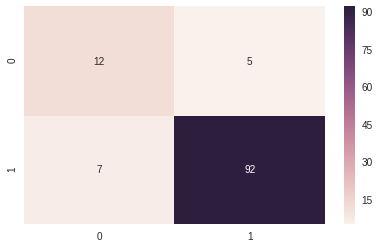

In [37]:
print("The categorical labels are as follows: Type 1 Diabeties = 1, and Type 2 Diabeties = 0.")
print()
print("The results of the confusion matrix are:")
print("True Negatives: " + str(tn))
print()
print("False Positives: " + str(fp))
print()
print("False Negatives: " + str(fn))
print()
print("True Positives: " + str(tp))
sns.heatmap(cm, annot=True, );

In [38]:
# checking our specificity vs sensitivity 
sensitivity = tp/(tp+fn);
specificity = tn/(tn+fp)

print('The sensitivity is {:.2f}, and the specificity is {:.2f}'.format(sensitivity,specificity))

The sensitivity is 0.93, and the specificity is 0.71


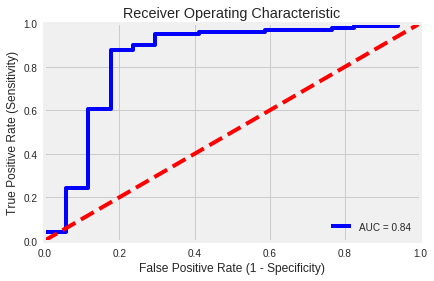

In [39]:
# Plotting ROC curve 
probs = logit.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)


plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate (Sensitivity)')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.show()

In [45]:
list(zip(np.exp(logit.coef_[0]),X.columns))

[(1.0014662253224933, 'currentAge'),
 (0.9645445277308372, 'diagnosisAge'),
 (1.0316822312183533, 'yearsLivingWithDiabetes'),
 (1.0025059811262715, 'has_a_basal.count'),
 (1.0024983233044718, 'basal.count'),
 (1.0025059811262715, 'has_a_bolus.count'),
 (0.9976967877528623, 'bolus.count'),
 (1.0097834016612623, 'has_a_cbg.count'),
 (1.0000325705722264, 'cbg.count'),
 (1.0024517260917627, 'has_a_deviceEvent.count'),
 (0.9956706423601545, 'deviceEvent.count'),
 (1.0025059811262715, 'has_a_pumpSettings.count'),
 (1.0108026077686383, 'pumpSettings.count'),
 (1.0026220752399522, 'has_a_smbg.count'),
 (1.0049462903688808, 'smbg.count'),
 (1.0002527802881447, 'upload.count'),
 (1.0025049643448551, 'has_a_wizard.count'),
 (1.0019209175789958, 'wizard.count'),
 (1.0097834016612623, 'has_a_cbg.nUniqueDeviceIds'),
 (1.0091625293702726, 'cbg.nUniqueDeviceIds'),
 (1.0025059811262715, 'has_a_bolus.nUniqueDeviceIds'),
 (1.0000686980597115, 'bolus.nUniqueDeviceIds'),
 (1.0026220752399522, 'has_a_smbg.n

<a id='later'></a>
Even though Type I diabetes is the majority class in our dataset, in reality overall it is the much rarer from of diabetes. Hence, the distribution of Type I and Type II in this dataset is actually the opposite one we would expect to encounter in the wild and when presented with more data.  It is for this reason that we chose not to balance the classes, and we believed optimizing for **sensitivity** to be the best course of action. Should we be given a new dataset where Type I is the minority class, we believe our model might still preform well. This, however, must be put to the test for validation.

Since the focus was on predicting type 1. Our data is not filtered in a way that would reflect the likelihood of having Type 1 diabetes over Type 2. We believe that since the data selection/gathering process was self selecting, it becomes hard to use any individual particular feature as a main predictor for whether or not someone has Type1 vs Type 2. From the histogram we know that if you were diagnosed at a young age, you are more likely to be Type 1. The data is not filtered to reflect that. 

<a id='part4'></a>
# Room for Further Exploration 
- Test our model on more data
- Try to use under-sampling, oversampling or SMOTE to make the data balanced, creating additional back up models to see how they all would preform on new data.
- Continue to experiment with GridSearch Cross Validation and hold-out policies to further guard against over-fitting. 
- Alter the prediction threshold value by doing probability calibration and finding a optimal threshold using AUC-ROC curve.
- Assign weight to classes such that the minority classes gets larger weight.
- Investigate de-correlating our features and further dimensionality reduction.
- Use anomaly detection.


[Back to Top](#part0)